# Reliance Stock Prediction

## dependent variable = Close Price

### 1. Import required packages

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

### 2. Read the data from the source

In [23]:
df = pd.read_csv('reliance_stock_data_(1990-2023).csv')

In [24]:
df.head(10)

,Date,Price,Open,High,Low,Volume,Change%
0,Nov 03 2023,2319.70,2327.20,2334.95,2315.75,4.43M,-0.02%
1,Nov 02 2023,2320.20,2313.95,2324.30,2307.95,5.28M,0.99%
2,Nov 01 2023,2297.40,2289.15,2317.50,2275.20,5.15M,0.42%
3,Oct 31 2023,2287.90,2328.00,2328.00,2282.90,6.40M,-1.06%
4,Oct 30 2023,2312.50,2274.00,2325.00,2269.95,8.41M,2.06%
5,Oct 27 2023,2265.80,2240.00,2273.50,2235.95,5.89M,1.77%
6,Oct 26 2023,2226.50,2251.00,2258.00,2220.30,7.61M,-1.39%
7,Oct 25 2023,2257.95,2250.05,2281.20,2243.00,5.81M,-0.23%
8,Oct 23 2023,2263.20,2290.00,2306.25,2255.25,3.93M,-1.56%
9,Oct 20 2023,2299.10,2300.00,2314.70,2296.30,4.46M,-0.31%


In [25]:
df = df.rename(columns={' Open': 'Open', ' High': 'High', ' Low': 'Low', ' Volume':'Volume',' Change%':'Change%'})

df.isna().sum()

In [26]:
df = df.dropna()

In [27]:
df.isna().sum()

Date       0
Price      0
Open       0
High       0
Low        0
Volume     0
Change%    0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8148 entries, 0 to 8150
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     8148 non-null   object 
 1   Price    8148 non-null   float64
 2   Open     8148 non-null   float64
 3   High     8148 non-null   float64
 4   Low      8148 non-null   float64
 5   Volume   8148 non-null   object 
 6   Change%  8148 non-null   object 
dtypes: float64(4), object(3)
memory usage: 509.2+ KB


In [29]:
# Convert the 'Date' column to the desired format
df['Date'] = pd.to_datetime(df['Date'], format='%b %d %Y').dt.strftime('%Y-%m-%d')

# Print the DataFrame
print(df)

            Date    Price     Open     High      Low Volume Change%
0     2023-11-03  2319.70  2327.20  2334.95  2315.75  4.43M  -0.02%
1     2023-11-02  2320.20  2313.95  2324.30  2307.95  5.28M   0.99%
2     2023-11-01  2297.40  2289.15  2317.50  2275.20  5.15M   0.42%
3     2023-10-31  2287.90  2328.00  2328.00  2282.90  6.40M  -1.06%
4     2023-10-30  2312.50  2274.00  2325.00  2269.95  8.41M   2.06%
...          ...      ...      ...      ...      ...    ...     ...
8146  1990-01-08     6.71     7.05     7.05     6.67      0   0.00%
8147  1990-01-05     6.71     6.37     6.71     6.37      0   3.23%
8148  1990-01-04     6.50     6.24     6.58     6.24      0  -6.07%
8149  1990-01-03     6.92     7.18     7.18     6.84      0  -4.81%
8150  1990-01-02     7.27     7.31     7.44     7.14      0  -1.62%

[8148 rows x 7 columns]


In [30]:
# Convert the 'Date' column to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the total number of days
total_days = (df['Date'].max() - df['Date'].min()).days

print(f"Total number of days: {total_days} days")


Total number of days: 12358 days


In [31]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Volume', 'Change%'], dtype='object')

In [32]:
df= df

In [33]:
df.drop(['Volume','Change%'], axis = 1, inplace= True)

### 3. To do Exploratory Data Analysis

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8148 entries, 0 to 8150
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    8148 non-null   datetime64[ns]
 1   Price   8148 non-null   float64       
 2   Open    8148 non-null   float64       
 3   High    8148 non-null   float64       
 4   Low     8148 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 381.9 KB


In [35]:
df.describe()

,Date,Price,Open,High,Low
count,8148,8148.000000,8148.000000,8148.000000,8148.000000
mean,2007-06-04 00:33:55.935198976,476.673440,477.150167,482.724291,471.102937
min,1990-01-02 00:00:00,4.360000,4.320000,4.400000,4.270000
25%,1999-05-09 06:00:00,33.847500,33.770000,34.190000,33.340000
50%,2007-06-20 12:00:00,303.830000,303.965000,308.965000,297.015000
75%,2015-09-03 06:00:00,482.530000,483.285000,489.377500,476.650000
max,2023-11-03 00:00:00,2619.850000,2609.000000,2630.950000,2580.000000
std,NaN,642.344756,642.899268,649.353609,635.904221


In [36]:
df.corr()

,Date,Price,Open,High,Low
Date,1.000000,0.799412,0.799395,0.799751,0.799102
Price,0.799412,1.000000,0.999807,0.999922,0.999916
Open,0.799395,0.999807,1.000000,0.999906,0.999899
High,0.799751,0.999922,0.999906,1.000000,0.999871
Low,0.799102,0.999916,0.999899,0.999871,1.000000


In [37]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low'], dtype='object')

In [38]:
# selected_columns = ['Date', ' Price', ' Open', ' High', ' Low']
# selected_data = df[selected_columns]

# # Create a box plot
# plt.figure(figsize=(10, 6))
# selected_data.boxplot()
# plt.title('Box Plot of Stock Data')
# plt.ylabel('Value')
# plt.xlabel('Variables')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


In [39]:
# Setting the layout for our plot
layout = go.Layout(
    title='Stock Prices of Reliance',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

reliance_data = [{'x':df['Date'], 'y':df['Price']}]
plot = go.Figure(data=reliance_data, layout=layout)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



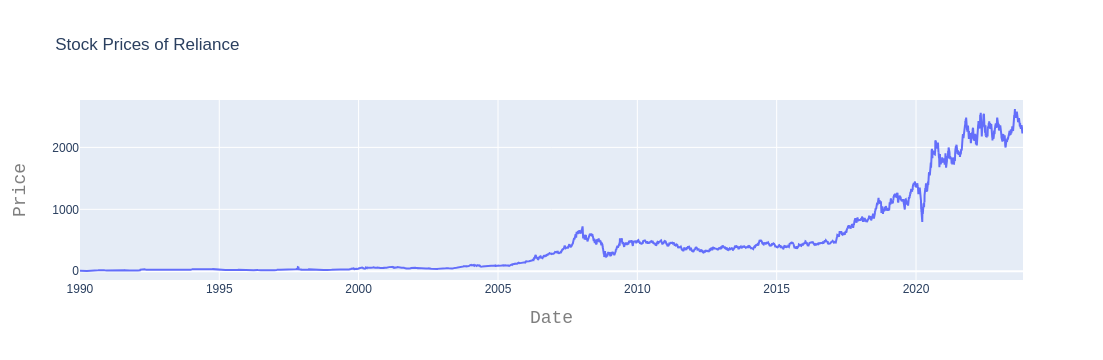

In [40]:
#plot(plot) #plotting offline
iplot(plot)

## 4. Data Pre- Processing

In [43]:
# Building the regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

### Split the data into train and test sets

In [44]:
X = np.array(df.index).reshape(-1,1)
Y = df['Price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

### Feature scaling

In [45]:
scaler = StandardScaler().fit(X_train)

### 5. Model Building

In [46]:
# from sklearn.linear_model import LinearRegression

# #Creating a linear model
# lm = LinearRegression()
# lm.fit(X_train, Y_train)

LinearRegression()

In [47]:
# #Plot actual and predicted values for train dataset
# trace0 = go.Scatter(
#     x = X_train.T[0],
#     y = Y_train,
#     mode = 'markers',
#     name = 'Actual'
# )
# trace1 = go.Scatter(
#     x = X_train.T[0],
#     y = lm.predict(X_train).T,
#     mode = 'lines',
#     name = 'Predicted'
# )
# reliance_data = [trace0,trace1]
# layout.xaxis.title.text = 'Day'
# plot2 = go.Figure(data=reliance_data, layout=layout)

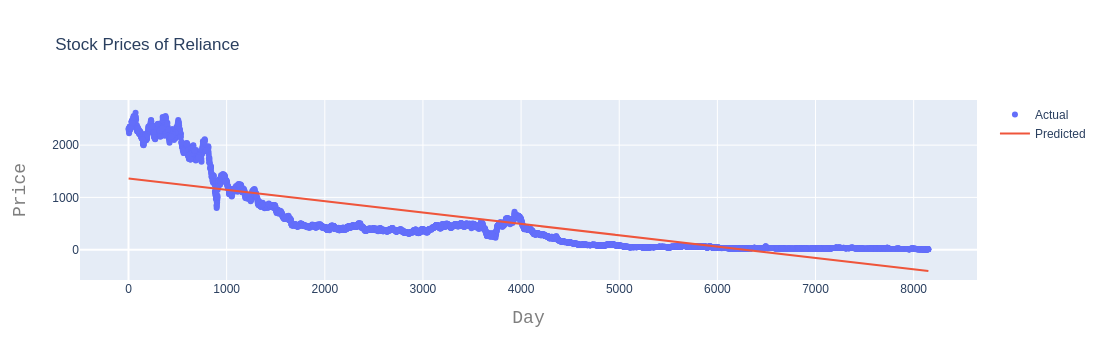

In [48]:
iplot(plot2)

## 6.Model Evaluation

In [49]:
# #Calculate scores for model evaluation
# scores = f'''
# {'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
# {'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
# {'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}
# '''
# print(scores)


Metric           Train                Test        
r2_score  0.6447611201335421	0.6461555622190045
MSE       144358.28948650492	151055.13414464841

